In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import pickle


season_21 = pd.read_csv('data/pitches_21.csv')
season_22 = pd.read_csv('data/pitches_21.csv')
season_23 = pd.read_csv('data/pitches_21.csv')

In [51]:
def plot_normalized_stacked_bar(df, characteristic, category, bins=5):
    """
    Plots a normalized stacked bar chart for a given characteristic and categorical variable.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - characteristic (str): The column name for the numeric characteristic to bin (e.g., 'relspeed').
    - category (str): The column name for the categorical variable to compare (e.g., 'eventtype').
    - bins (int): The number of bins to divide the characteristic into.
    """
    # Bin the characteristic into categories (you can adjust the number of bins)
    df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)

    # Create a pivot table for the stacked bar chart with normalized values
    stacked_data = df.pivot_table(index=f'{characteristic}_bin', columns=category, aggfunc='size', fill_value=0)

    # Normalize by dividing by the sum across each bin (row-wise normalization)
    stacked_data_normalized = stacked_data.div(stacked_data.sum(axis=1), axis=0)

    # Plot the normalized stacked bar chart
    stacked_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Normalized Stacked Bar Chart: {characteristic.capitalize()} Bins vs {category.capitalize()} (Proportions)')
    plt.xlabel(f'{characteristic.capitalize()} Bins')
    plt.ylabel('Proportion of Events')
    plt.legend(title=category.capitalize())
    plt.show()

# Example usage:
# plot_normalized_stacked_bar(df, 'relspeed', 'eventtype', bins=5)

In [36]:
baseball_df = pd.read_pickle("data/aggregated_data.pkl")

In [37]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,-4.785487,-1.635034,-0.637811,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97304,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,2,1.0,0,0.0,1.0,...,-12.570356,-5.199846,-0.179562,1.897783,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97304,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,2,1.0,0,0.0,1.0,...,-12.570356,-5.199846,-0.179562,1.897783,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium


In [38]:
baseball_df['pitcher'].value_counts()

pitcher
Wheeler, Zack       9615
Mahle, Tyler        9582
Castillo, Luis      9480
Ray, Robbie         9423
Buehler, Walker     9393
                    ... 
Gonzalez, Romy        12
Freeman, Mike         12
Mayfield, Jack         9
Wilkerson, Steve       9
Alberto, Hanser        6
Name: count, Length: 907, dtype: int64

In [39]:
baseball_df.columns

Index(['gameid', 'GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

## Defining High Pressure (for batters) in our scenario as the count containing 2 strikes 

In [40]:
high_pressure_df = baseball_df[baseball_df['strikes'] == 2.0 and baseball_df['balls' == ]].copy()

In [41]:
high_pressure_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,10.892494,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,10.892494,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97300,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,4,1.0,0,1.0,2.0,...,10.892494,4.379483,-0.529703,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97299,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,5,1.0,0,2.0,2.0,...,-15.050150,-2.238000,0.652965,2.396171,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
97299,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,2,5,1.0,0,2.0,2.0,...,-15.050150,-2.238000,0.652965,2.396171,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536050,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,4,9.0,1,1.0,2.0,...,13.520254,11.462074,-1.921934,3.071086,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium
536706,2021/10/03/tbamlb-nyamlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,66,5,9.0,1,2.0,2.0,...,-7.014169,-1.064341,0.734495,2.058994,147,New York Yankees,139,Tampa Bay Rays,3313,Yankee Stadium


## Explore What the Most Common Pitches are in a 2-Count Strike

## Just Looking at strikeouts and fieldouts - Do we find any significant differences in their appearances based on our chosen characteristics? 

In [44]:
high_pressure_df['eventtype'].value_counts()

eventtype
strikeout    125316
field_out     82497
Name: count, dtype: int64

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


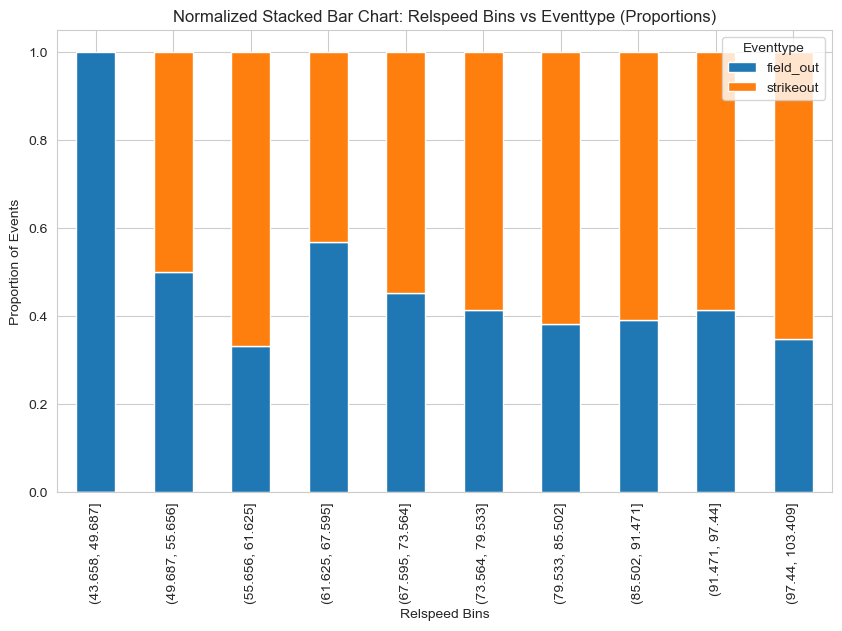

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


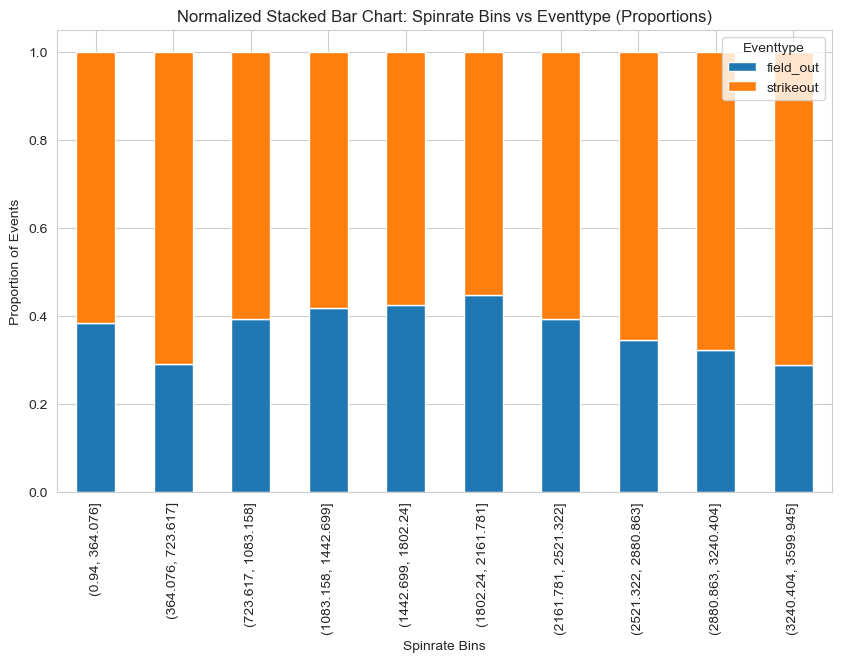

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


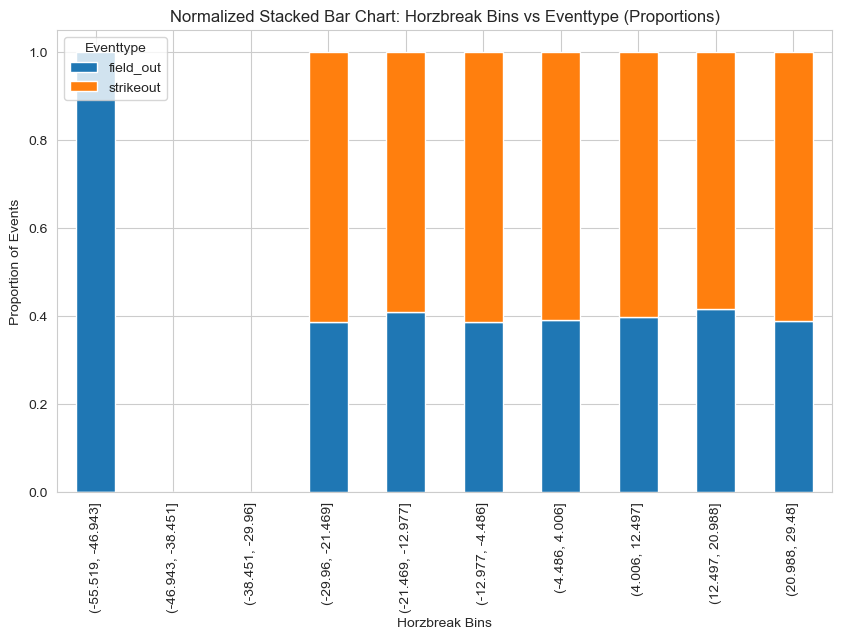

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


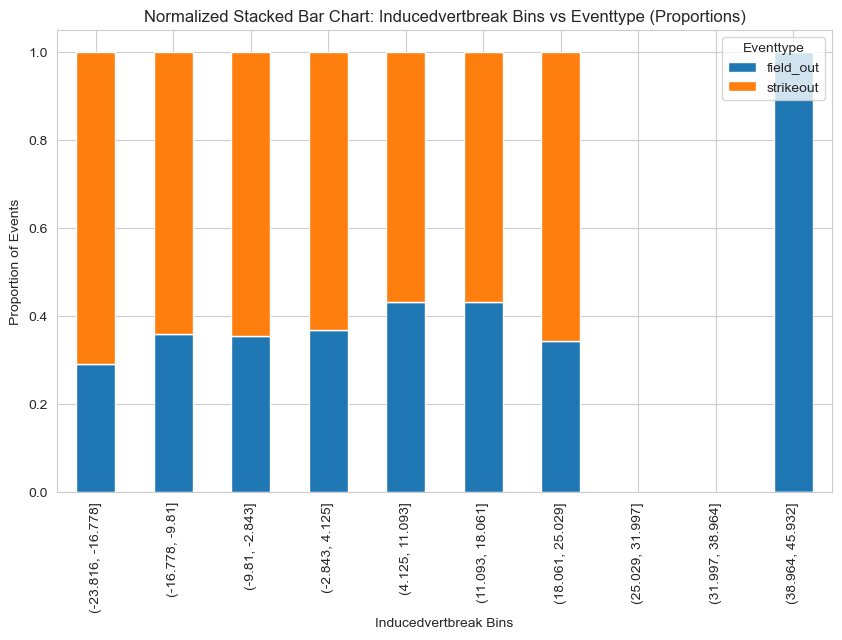

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


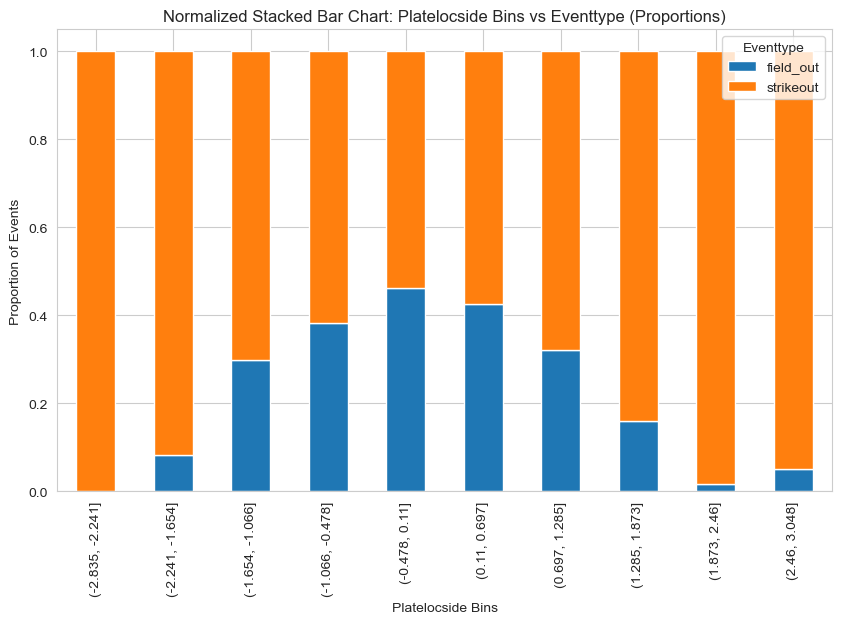

/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/280070243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{characteristic}_bin'] = pd.cut(df[characteristic], bins=bins)


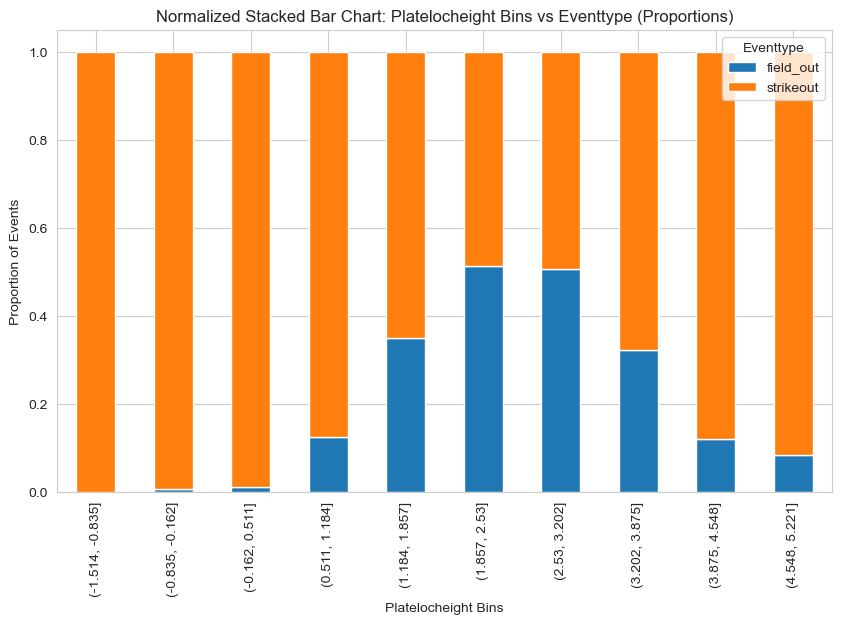

In [57]:
characteristics = [ 'relspeed', 'spinrate', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

for characteristic in characteristics:
    plot_normalized_stacked_bar(high_pressure_df, characteristic, 'eventtype', bins=10)

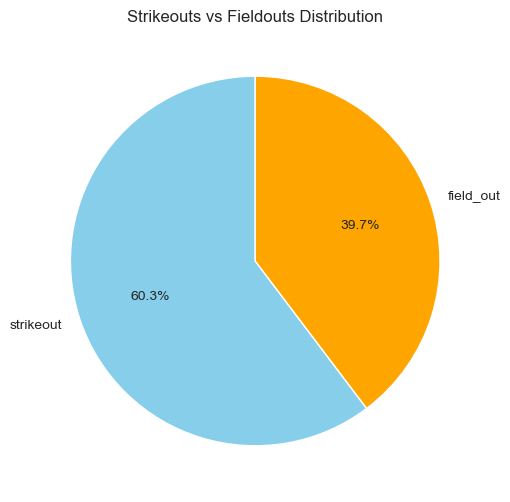

In [47]:
# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['eventtype'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(eventtype_counts, labels=eventtype_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Strikeouts vs Fieldouts Distribution')
plt.show()

## Trying to Fit a Logistic Regression Model to our data

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm

# Assuming your DataFrame is df and 'eventtype' is your target variable

# Convert eventtype to a binary variable (1 for 'strikeout', 0 for 'fieldout')
high_pressure_df['eventtype_binary'] = high_pressure_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Select the characteristics
characteristics = [#'relspeed',
    'spinrate', 'horzbreak', #'inducedvertbreak'
    'platelocside', 'platelocheight']

# Check for missing values and fill/drop if necessary
df = high_pressure_df.dropna(subset=characteristics)

# Split data into features (X) and target (y)
X = df[characteristics]
y = df['eventtype_binary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_72394/2210366960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pressure_df['eventtype_binary'] = high_pressure_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)


In [61]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.29      0.05      0.08     24611
           1       0.60      0.92      0.73     37733

    accuracy                           0.58     62344
   macro avg       0.44      0.49      0.40     62344
weighted avg       0.48      0.58      0.47     62344

ROC AUC Score: 0.5761155249818574


## Our Models perform poorly given just our pitch characteristics and Strikeout/Fieldout, this could suggest a bunch of things, some that I can think of: 
- Our pitch characteristics may just have relationships that cannot be captured with logistic regression
- Fieldouts/Strikeouts are just too similar and there's no real difference in what pitches result in any specific type of out
- Our data just isn't specific enough to look into a question that looks at Strike**outs** and Field**outs**

## Moving Forward - Trying to Get more Narrow

In [ ]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & ((baseball_df['balls'] == 0) | (baseball_df['balls'] == 1))].copy()

In [42]:
high_pressure_df['eventtype'].value_counts()

eventtype
ball                          170277
foul                          144537
strikeout                     125316
field_out                      82497
single                         28560
walk                           24051
blocked_ball                   18264
double                          8502
home_run                        5874
force_out                       4110
grounded_into_double_play       3480
hit_by_pitch                    2703
wild_pitch                      1950
field_error                     1587
stolen_base_2b                  1224
sac_fly                         1155
triple                           774
fielders_choice                  456
double_play                      432
strikeout_double_play            315
fielders_choice_out              312
sac_bunt                         249
caught_stealing_2b               216
passed_ball                      174
stolen_base_3b                   126
catcher_interf                    90
defensive_indiff            

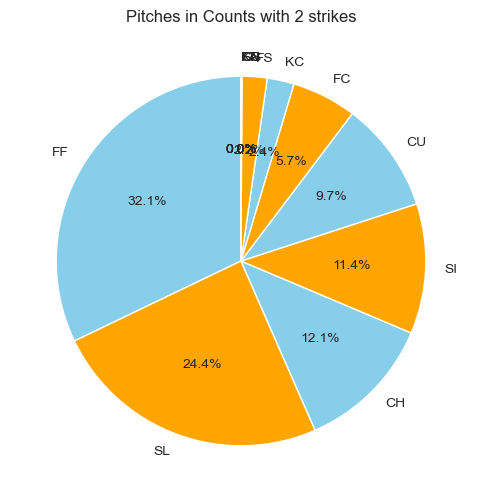

In [63]:
# Count of strikeouts and fieldouts
eventtype_counts = high_pressure_df['pitchname'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(eventtype_counts, labels=eventtype_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Pitches in Counts with 2 strikes')
plt.show()

In [43]:
high_pressure_df = high_pressure_df[high_pressure_df['eventtype'].isin(['strikeout', 'field_out'])]
high_pressure_df = high_pressure_df[high_pressure_df['pitchname'].isin(['FF', 'SL'])]